# **IBM HACK CHALLENGE 2020**

# TEAM NAME:SUPERSONICS

**TEAM MEMBERS:**

**D.Bala koteswara sastry**

**M.Bindu Sri**

Understanding Data:
Here is the Definitions of the columns of the data
1.Text           object
2.Date           object
3.Location       object
4.Sentiments    float64

Number of Techniques implemented : 10 techniques
1. Names of the techniques implemented:i)Finding Mean of a column
                                       ii)Finding Median of a column
                                       iii)Finding Mode of a column
                      Pre-Processing :-
                                       iv)Checking missing values
                                       v)Checking Unique Values in the dataset
                                       vi)'Logistic Regression'
                                       vii)'Naive Bayes'
                                       viii)'Decision Tree'
                                        ix)'Random Forest'
                                         x)Tensorflow Method
                                       
2.This modeling dataset is from:
https://ieee-dataport.org/open-access/coronavirus-covid-19-tweets-dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,roc_auc_score,precision_score,recall_score
from sklearn.metrics import classification_report

In [ ]:
train=pd.read_csv("COVID-19_Sentiments.csv")
train.head()

,Text_Id,Text,Date,Location,Sentiments
0,1241032866567356417,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:27 +0000 2020,"Uttar Pradesh, India",0.000
1,1241032867699765249,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:27 +0000 2020,Mumbai,0.000
2,1241032875102703616,"RT @SmokingSkills_: Daughter of an IAS, son of...",Fri Mar 20 16:04:29 +0000 2020,"Jodhpur, India",0.350
3,1241032877099237379,RT @narendramodi: The young actors have someth...,Fri Mar 20 16:04:29 +0000 2020,"Gurugram, Bharat",0.125
4,1241032870405128192,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:28 +0000 2020,"New Delhi, India",0.000


In [ ]:
print('Train Data Shape:{}'.format(train.shape))

Train Data Shape:(324479, 5)


In [ ]:
df=pd.read_csv("COVID-19_Sentiments.csv")

print("Shape of dataset: ")
print(df.shape)
print("Data types of each column:")
print(df.dtypes)
#print(df.describe())
#print(df.describe(include="all"))
missing_data=df.isnull()
print("All the values in dataset whether missing value or not:")
print(missing_data)


Shape of dataset: 
(324479, 5)
Data types of each column:
Text_Id         int64
Text           object
Date           object
Location       object
Sentiments    float64
dtype: object
All the values in dataset whether missing value or not:
        Text_Id   Text   Date  Location  Sentiments
0         False  False  False     False       False
1         False  False  False     False       False
2         False  False  False     False       False
3         False  False  False     False       False
4         False  False  False     False       False
5         False  False  False     False       False
6         False  False  False     False       False
7         False  False  False     False       False
8         False  False  False     False       False
9         False  False  False     False       False
10        False  False  False     False       False
11        False  False  False     False       False
12        False  False  False     False       False
13        False  False  False     

In [ ]:
print("Total No.of missing values in Sentiments  Column:")
print(df['Sentiments'].isnull().sum())

Total No.of missing values in Sentiments  Column:
5490


***Finding Mean of a column:***

In [ ]:
df['Sentiments']=df['Sentiments'].replace(" ",np.nan)
df['Sentiments'] = df['Sentiments'].fillna(0)
mean=df['Sentiments'].astype("float").mean(axis=0)
print("Mean of the values is: ")
print(mean)

Mean of the values is: 
0.07234323572322793


***Finding Median of a column:***

In [ ]:
#print(df)
df['Sentiments']=df['Sentiments'].replace(" ",np.nan)
df['Sentiments'] = df['Sentiments'].fillna(0)
median=df['Sentiments'].astype("float").median(axis=0)
print("Median of the values is: ")
print(median)

Median of the values is: 
0.0


***Finding Mode of a column:***

In [ ]:
df['Sentiments']=df['Sentiments'].replace(np.nan,median)
df['Sentiments']=df['Sentiments'].replace(" ",np.nan)
#df['bmi'].fillna(df.bmi.mode(), inplace=True)
mode = df['Sentiments'].mode()[0]
print("Mode of the column is: ")
print(mode)

Mode of the column is: 
0.0


# CHECKING MISSING VALUES

In [ ]:
train_missing_values=train.isnull().sum()
train_missing_values

Text_Id          0
Text             0
Date             0
Location         0
Sentiments    5490
dtype: int64

# DATA PREPROCESSING

In [ ]:
train_data=train.dropna(axis=0,how="any")

print('Train Data Shape:{}'.format(train_data.shape))


Train Data Shape:(318989, 5)


In [ ]:
str_data=train_data.select_dtypes(include=['object'])

In [ ]:
int_data=train_data.select_dtypes(include=['integer','float'])

In [ ]:
label=LabelEncoder()
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

,Text,Date,Location,Text_Id,Sentiments
0,138010,15303,7291,1241032866567356417,0.000
1,138010,15303,4826,1241032867699765249,0.000
2,101880,15305,3568,1241032875102703616,0.350
3,126304,15305,2685,1241032877099237379,0.125
4,138010,15304,5356,1241032870405128192,0.000


In [ ]:
ytrain=features["Sentiments"]
ytrain.head()

0    0.000
1    0.000
2    0.350
3    0.125
4    0.000
Name: Sentiments, dtype: float64

In [ ]:
xtrain=features.drop(["Sentiments","Text_Id"],axis=1)
xtrain.head()

,Text,Date,Location
0,138010,15303,7291
1,138010,15303,4826
2,101880,15305,3568
3,126304,15305,2685
4,138010,15304,5356


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Loading Data
df = pd.read_csv('COVID-19_Sentiments.csv')

In [ ]:
df.head()

,Text_Id,Text,Date,Location,Sentiments
0,1241032866567356417,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:27 +0000 2020,"Uttar Pradesh, India",0.000
1,1241032867699765249,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:27 +0000 2020,Mumbai,0.000
2,1241032875102703616,"RT @SmokingSkills_: Daughter of an IAS, son of...",Fri Mar 20 16:04:29 +0000 2020,"Jodhpur, India",0.350
3,1241032877099237379,RT @narendramodi: The young actors have someth...,Fri Mar 20 16:04:29 +0000 2020,"Gurugram, Bharat",0.125
4,1241032870405128192,RT @theskindoctor13: Shaheen Bagh is still on....,Fri Mar 20 16:04:28 +0000 2020,"New Delhi, India",0.000


In [ ]:
# Modifying Date
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [ ]:
# Creating new_sentiments column out of polarities in sentiments
New_Sentiments_ls = []

for senti in df['Sentiments']:
    if senti < 0:
        New_Sentiments_ls.append(-1)
    elif senti > 0:
        New_Sentiments_ls.append(1)
    else:
        New_Sentiments_ls.append(0)

New_Sentiments_ls = pd.DataFrame(New_Sentiments_ls, columns=['New_Sentiments'])

df = pd.concat([df, New_Sentiments_ls], axis=1)

In [ ]:
df.head()

,Text_Id,Text,Date,Location,Sentiments,New_Sentiments
0,1241032866567356417,RT @theskindoctor13: Shaheen Bagh is still on....,2020-03-20,"Uttar Pradesh, India",0.000,0
1,1241032867699765249,RT @theskindoctor13: Shaheen Bagh is still on....,2020-03-20,Mumbai,0.000,0
2,1241032875102703616,"RT @SmokingSkills_: Daughter of an IAS, son of...",2020-03-20,"Jodhpur, India",0.350,1
3,1241032877099237379,RT @narendramodi: The young actors have someth...,2020-03-20,"Gurugram, Bharat",0.125,1
4,1241032870405128192,RT @theskindoctor13: Shaheen Bagh is still on....,2020-03-20,"New Delhi, India",0.000,0


## Cleaning the text

In [ ]:
# Cleaning the text
def func(x):
    try:
        trial = x.split(':')[1]
        return trial
    except:
        return x
df['Regenerated_Text'] = df['Text'].apply(lambda x: func(x))

In [ ]:
# Converting to lower case
df['Regenerated_Text'] = df['Regenerated_Text'].apply(lambda x: x.lower())

# Removing urls
df['Regenerated_Text'] = df['Regenerated_Text'].apply(lambda x: x.split('https')[0])
df['Regenerated_Text'] = df['Regenerated_Text'].apply(lambda x: x.split('http')[0])

# Converting #word into just word
df['Regenerated_Text'] = df['Regenerated_Text'].str.replace('#', '')

# Remove @username
df['Regenerated_Text'] = df['Regenerated_Text'].str.replace('@[^\s]+','')

# Removing unwanted char
df['Regenerated_Text'] = df['Regenerated_Text'].str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ")    

# Remove additional white spaces
df['Regenerated_Text'] = df['Regenerated_Text'].str.replace('[\s]+', ' ')

In [ ]:
df.head()

,Text_Id,Text,Date,Location,Sentiments,New_Sentiments,Regenerated_Text
0,1241032866567356417,RT @theskindoctor13: Shaheen Bagh is still on....,2020-03-20,"Uttar Pradesh, India",0.000,0,shaheen bagh is still on mosques are open mui...
1,1241032867699765249,RT @theskindoctor13: Shaheen Bagh is still on....,2020-03-20,Mumbai,0.000,0,shaheen bagh is still on mosques are open mui...
2,1241032875102703616,"RT @SmokingSkills_: Daughter of an IAS, son of...",2020-03-20,"Jodhpur, India",0.350,1,daughter of an ias son of a kolkata officer s...
3,1241032877099237379,RT @narendramodi: The young actors have someth...,2020-03-20,"Gurugram, Bharat",0.125,1,the young actors have something to say its ti...
4,1241032870405128192,RT @theskindoctor13: Shaheen Bagh is still on....,2020-03-20,"New Delhi, India",0.000,0,shaheen bagh is still on mosques are open mui...


In [ ]:
df.shape

(324479, 7)

## Model Training

In [ ]:
def acc_call(y_test, y_pred):
    
    # Calculating accuracy
    acc_score = round(accuracy_score(y_test, y_pred)*100, 2)
    f_one_score = round(f1_score(y_test, y_pred, average='weighted')*100, 2)
    acc_dict = {'Acc_Score': acc_score, 'F1_Score': f_one_score}
    
    return acc_dict

In [ ]:
def con_mat_call(y_test, y_pred):
    
    # Creating confusion matrix
    unique_label = np.unique([y_test, y_pred])
    cmtx = pd.DataFrame(
        confusion_matrix(y_test, y_pred, labels=unique_label), 
        index=['true:{:}'.format(x) for x in unique_label], 
        columns=['pred:{:}'.format(x) for x in unique_label]
    )
    
    return sns.heatmap(cmtx, cbar=False, annot=True, fmt='.2f')

In [ ]:
def train_textblob(dataframe):
    '''This func uses textblob for finding sentiments and returns accuracy '''
    
    # feed in data to textblob
    sentiments = []
    for text in dataframe['Regenerated_Text']:
        analysis = TextBlob(text)

        if analysis.sentiment.polarity > 0:
            sentiments.append(1)
        elif analysis.sentiment.polarity < 0:
            sentiments.append(-1)
        else:
            sentiments.append(0)
    
    print(acc_call(dataframe['New_Sentiments'], sentiments))
    
    return con_mat_call(dataframe['New_Sentiments'], sentiments)

{'Acc_Score': 85.88, 'F1_Score': 85.93}
AxesSubplot(0.125,0.125;0.775x0.755)


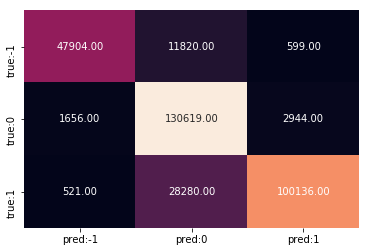

In [ ]:
print(train_textblob(df))

# Model training through NLP

In [ ]:
# tokenization; process for creation of bag of words model.

corpus = []
for i in range(0, 648958):
    review = re.sub('[^a-zA-Z]', ' ', df['Regenerated_Text'][i])
    review = review.split()
    
    # The Porter stemming is used for removing the commoner
    # morphological and inflexional endings from words in English.
    ps = PorterStemmer()
    
    # Stopwords is a process of removing unnecessary english words
    # that are not took part in npl tasks.
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
len(corpus)

648958

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=99500)
X = cv.fit_transform(corpus)
y = df.New_Sentiments.values

In [ ]:
print(f'X_shape-->{X.shape}')

X_shape-->(648958, 99500)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
print(f'X_train_shape-->{X_train.shape}; X_test_shape-->{X_test.shape}')

X_train_shape-->(454270, 99500); X_test_shape-->(194688, 99500)


In [ ]:
def checking_models(X_train, X_test, y_train, y_test):
    '''This function is used to check accuracy on different models of nlp'''
    
    # Fitting and predicting logistic regression to the Training set.
    logreg_classifier = LogisticRegression()
    logreg_classifier.fit(X_train, y_train)
    y_pred_logreg_test = logreg_classifier.predict(X_test)
    y_pred_logreg_train = logreg_classifier.predict(X_train)
    
    # Fitting and predicting Naive Bayes to the Training set.
    nv_classifier = MultinomialNB()
    nv_classifier.fit(X_train, y_train)
    y_pred_nv_test = nv_classifier.predict(X_test)
    y_pred_nv_train = nv_classifier.predict(X_train)

    # Fitting and predicting Decision Tree to Training set.
    tree_classifier = DecisionTreeClassifier()
    tree_classifier.fit(X_train, y_train)
    y_pred_tree_test = tree_classifier.predict(X_test)
    y_pred_tree_train = tree_classifier.predict(X_train)
    
    # Fitting and predicting Random forest to Training set.
    ran_classifier = RandomForestClassifier()
    ran_classifier.fit(X_train, y_train)
    y_pred_ran_test = ran_classifier.predict(X_test)
    y_pred_ran_train = ran_classifier.predict(X_train)
    
    # Accuracy details.
    logreg_train_acc = acc_call(y_train, y_pred_logreg_train)
    logreg_test_acc = acc_call(y_test, y_pred_logreg_test)
    
    nv_train_acc = acc_call(y_train, y_pred_nv_train)
    nv_test_acc = acc_call(y_test, y_pred_nv_test)
    
    tree_train_acc = acc_call(y_train, y_pred_tree_train)
    tree_test_acc = acc_call(y_test, y_pred_tree_test)
    
    ran_train_acc = acc_call(y_train, y_pred_ran_train)
    ran_test_acc = acc_call(y_test, y_pred_ran_test)
    
    training_dict = {'Logistic Regression': logreg_train_acc,
                     'Naive Bayes': nv_train_acc,
                     'Decision Tree': tree_train_acc,
                     'Random Forest': ran_train_acc
                    }
    
    test_dict = {'Logistic Regression': logreg_test_acc,
                 'Naive Bayes': nv_test_acc,
                 'Decision Tree': tree_test_acc,
                 'Random Forest': ran_test_acc
                }
    
    print(f'Accuracy Checking for training data:- {training_dict}')
    print(f'Accuracy Checking for test data:- {test_dict}')
    
    # Returning dictionary of every prediction file for later use.
    pred_dict = {'Logistic_Regression_pred': [y_pred_logreg_train, y_pred_logreg_test],
                 'Naive_Bayes_pred': [y_pred_nv_train, y_pred_nv_test],
                 'Decision_Tree_pred': [y_pred_tree_train, y_pred_tree_test],
                 'Random_Forest_pred': [y_pred_ran_train, y_pred_ran_test]
                }
    
    return pred_dict

In [ ]:
all_dict = checking_models(X_train, X_test, y_train, y_test)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy Checking for training data:- {'Logistic Regression': {'Acc_Score': 91.38, 'F1_Score': 91.33}, 'Naive Bayes': {'Acc_Score': 83.08, 'F1_Score': 83.07}, 'Decision Tree': {'Acc_Score': 98.28, 'F1_Score': 98.28}, 'Random Forest': {'Acc_Score': 98.08, 'F1_Score': 98.08}}
Accuracy Checking for test data:- {'Logistic Regression': {'Acc_Score': 88.22, 'F1_Score': 88.1}, 'Naive Bayes': {'Acc_Score': 79.31, 'F1_Score': 79.19}, 'Decision Tree': {'Acc_Score': 97.71, 'F1_Score': 97.71}, 'Random Forest': {'Acc_Score': 97.25, 'F1_Score': 97.26}}


In [ ]:
print(all_dict['Random_Forest_pred'])

[array([ 0,  0,  1, ..., -1,  0,  0], dtype=int64), array([0, 0, 1, ..., 1, 1, 0], dtype=int64)]


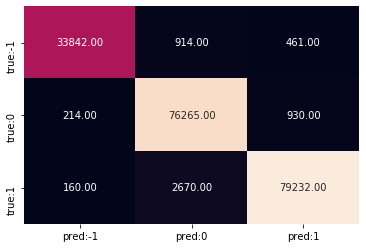

In [ ]:
y_pred = all_dict['Random_Forest_pred'][1]
con_mat_call(y_test, y_pred)

In [ ]:
sentiments_NLP = np.concatenate((all_dict['Random_Forest_pred'][0], y_pred))
sentiments_NLP

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [ ]:
Date_Sentiments = pd.DataFrame({
                                'Date': df['Date'],
                                'Sentiments': sentiments_NLP,
                               })

In [ ]:
Date_Sentiments.head()

,Date,Sentiments
0,2020-03-20,0
1,2020-03-20,0
2,2020-03-20,1
3,2020-03-20,1
4,2020-03-20,0


In [ ]:
Date_Sentiments.to_csv('Date_Sentiments.csv', index=False)

# Tensorflow Method

In [ ]:
data = pd.read_csv('Date_Sentiments.csv')

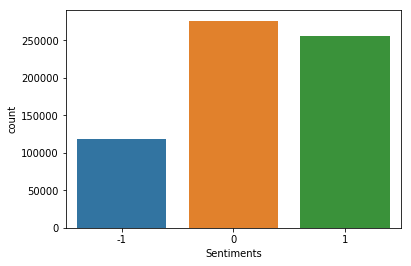

In [ ]:
import seaborn as sns
%matplotlib inline
sns.countplot(x='Sentiments',data=data)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


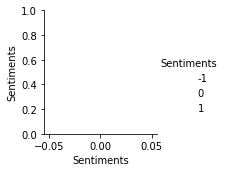

In [ ]:
sns.pairplot(data,hue='Sentiments')

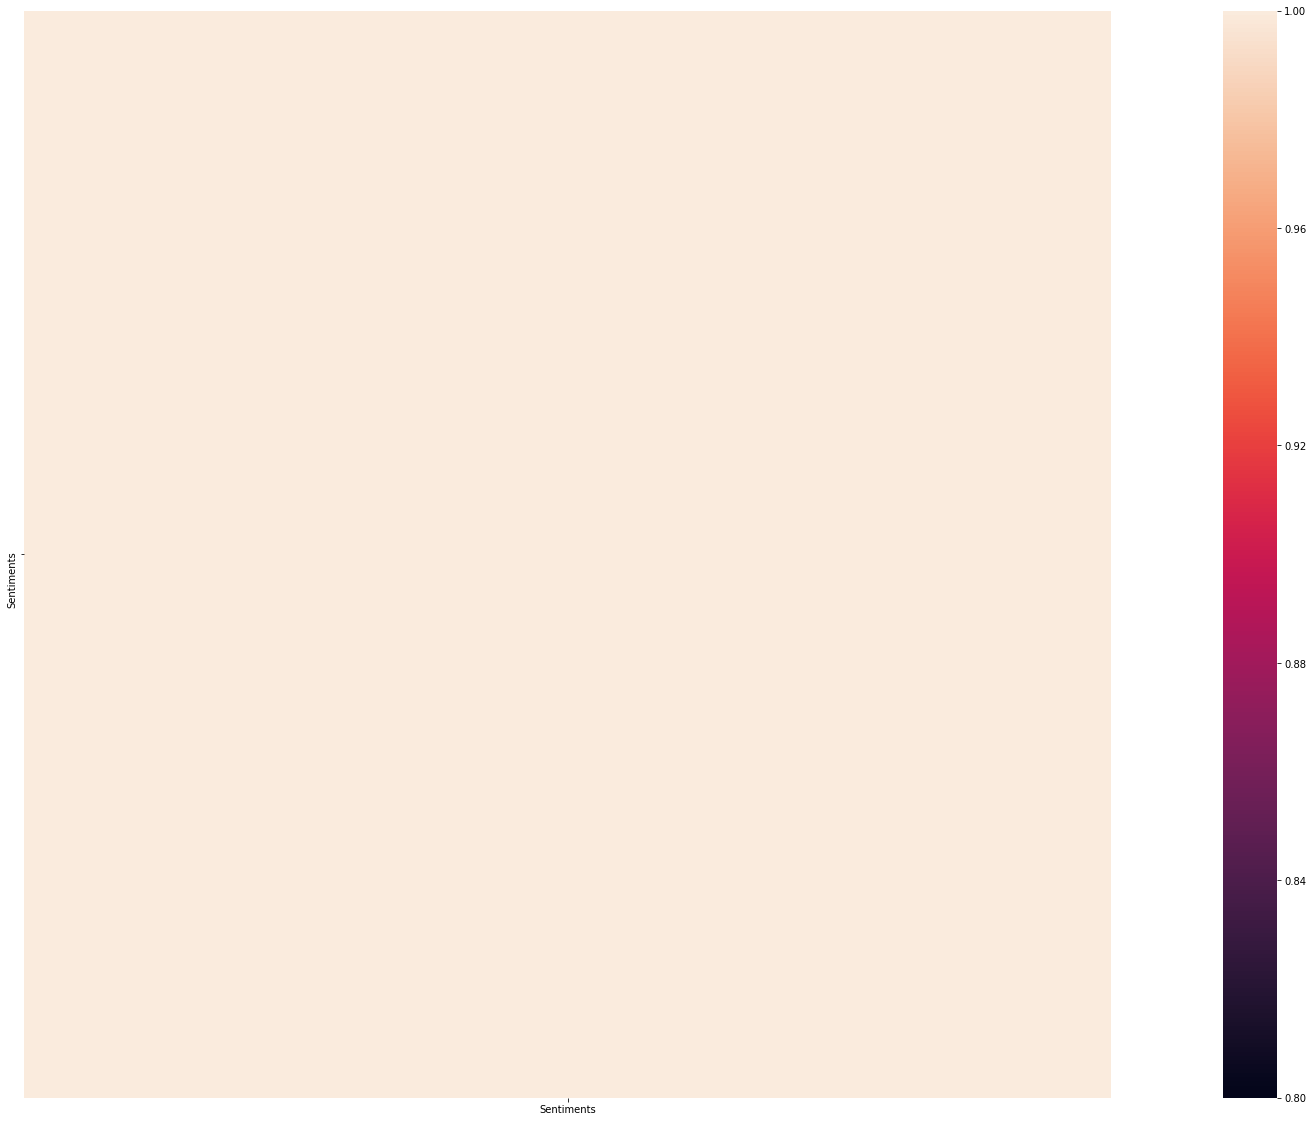

In [ ]:
# Correlation matrix

corrmat = data.corr()
fig = plt.figure(figsize = (40, 20))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

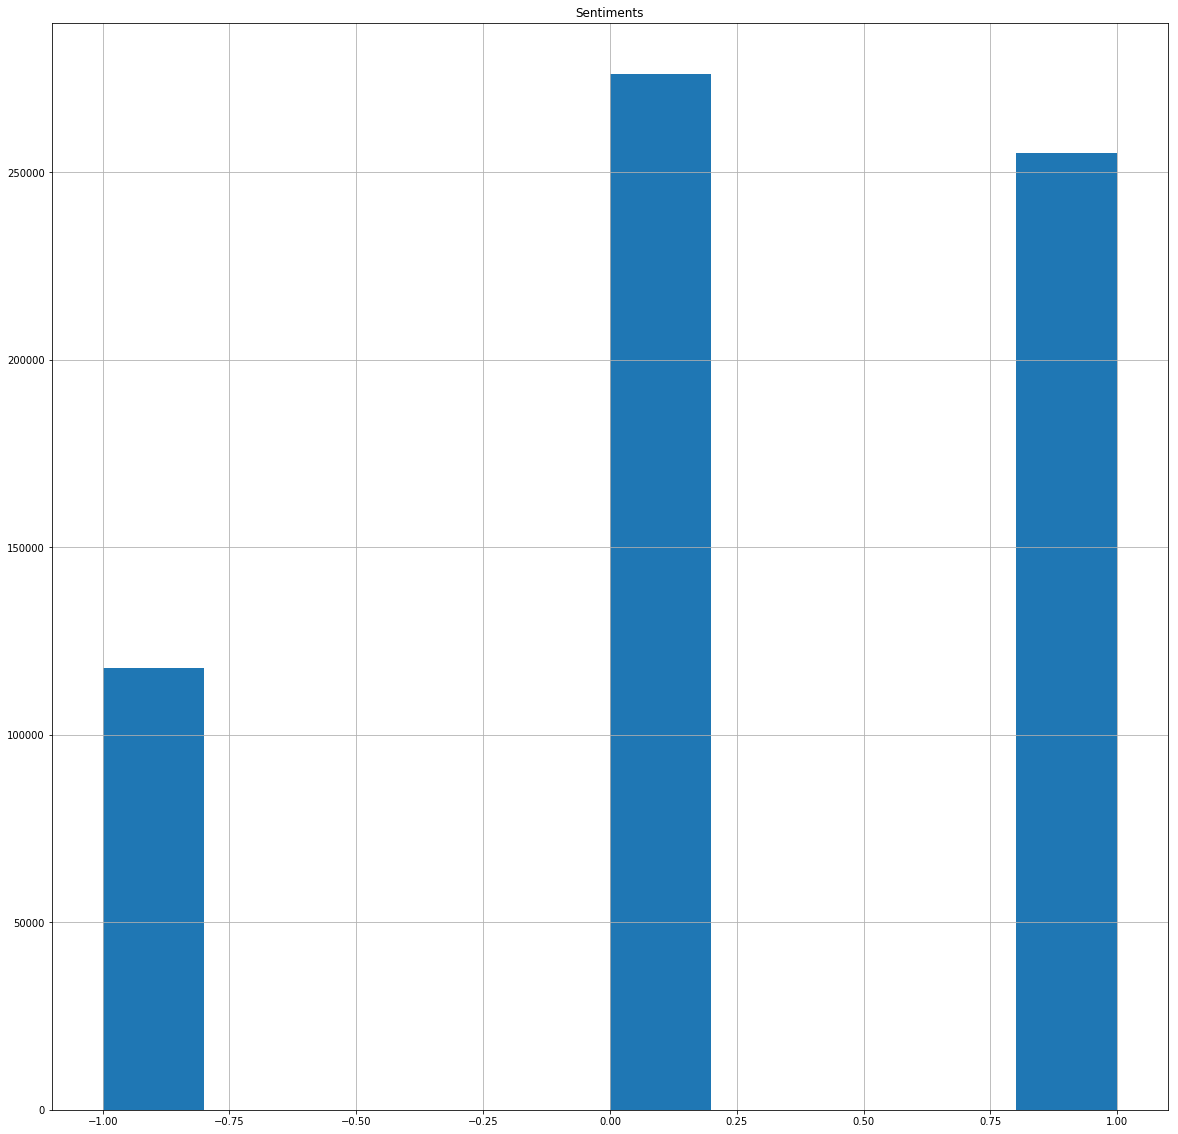

In [ ]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()

# ***THANK YOU***